# Hierarchical Clustering


In [26]:
#bu da Kmeans gibi bir model

In [27]:
#Kmeans'ten farkli olarak burda inertia yok,dendogramlar üzerinden karar verecez,
#soulitte kullanilacaz

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [29]:
df = pd.read_csv("iris.csv")

In [30]:
df.drop('species',axis=1,inplace=True)

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


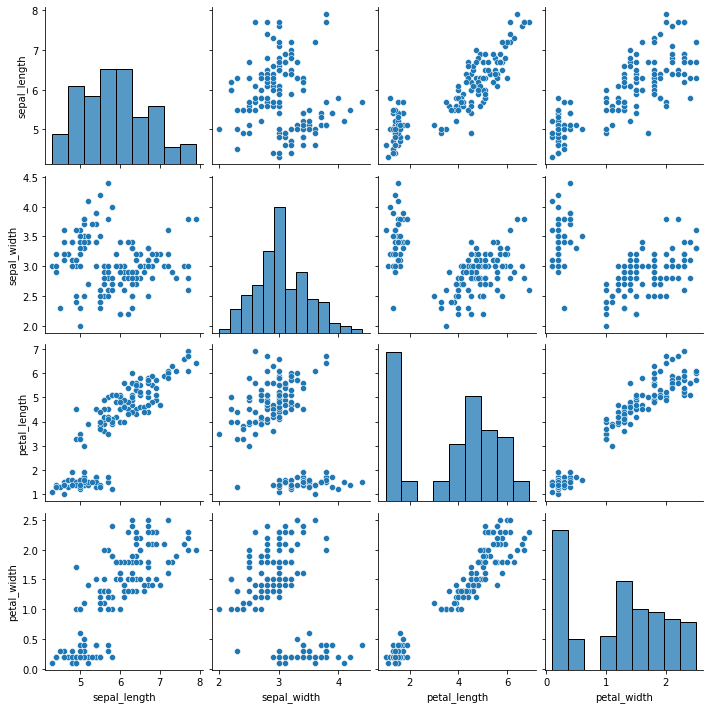

In [34]:
sns.pairplot(df);

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

In [35]:
X=df.copy()

## Dendrogram--(denn-dıırııg.reeaam)

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
#dendrogram()

#ideal bir model kurmadan görsellerle cluster sayisini belirleyebiliyoruz
#datayi saf bir sekilde vermiyoruz,linkage bu yüzden burda
#

In [ ]:
#ward -varyanslara göre callisiyor

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [ ]:
#bu alttaki ifadeler ,biraz sonra dendrogram cizerken bu kriterlere göre cizecegiz

In [38]:
hc_ward = linkage (y= X, method ="ward") #varyansa göre,    gözlemi,varyansi düsürdügü kümeye atiyor
hc_complete = linkage (X, "complete") #en uzak noktaya göre .kümelerin en uzak noktalarini ölcüyor,kendisine en yakin olan gruba kendini atiyor
hc_average = linkage (X, "average") #ortalamaya göre , bir gözlemin herbir kümemnin elemanlarina teker teker uzakligina bakiyor,mean aliyor,en yakin olana kendine atiyor
hc_single= linkage(X ,"single") #en yakın noktaya göre,   bir kümenin kendisine en yakin olan noktalari ölcüyor,kendini en yakin olan kümeye atiyor

![](2022-10-18-21-41-44.png)

![](2022-10-18-21-42-15.png)

In [ ]:
#burda kendini en yakin varyansli yere atiyor

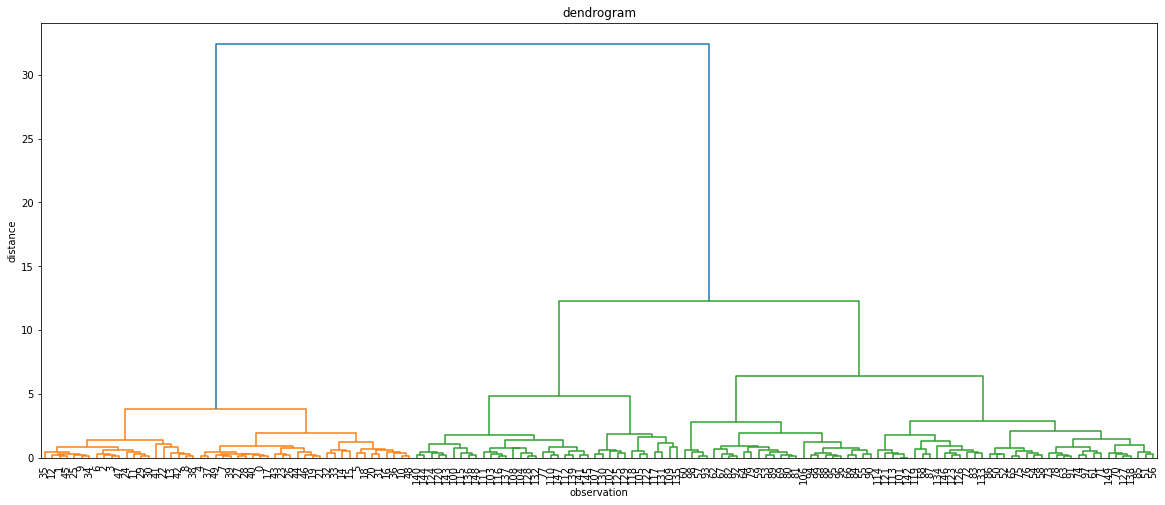

In [39]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

![](2022-10-18-21-50-09.png)

In [ ]:
# en genis yer neresiyse oradan cizgi ciziyorum,burda 3 class'a bölüyorum

In [ ]:
# dendogramda kac class'a böldügünü cizgiler cizerek buluyoruz

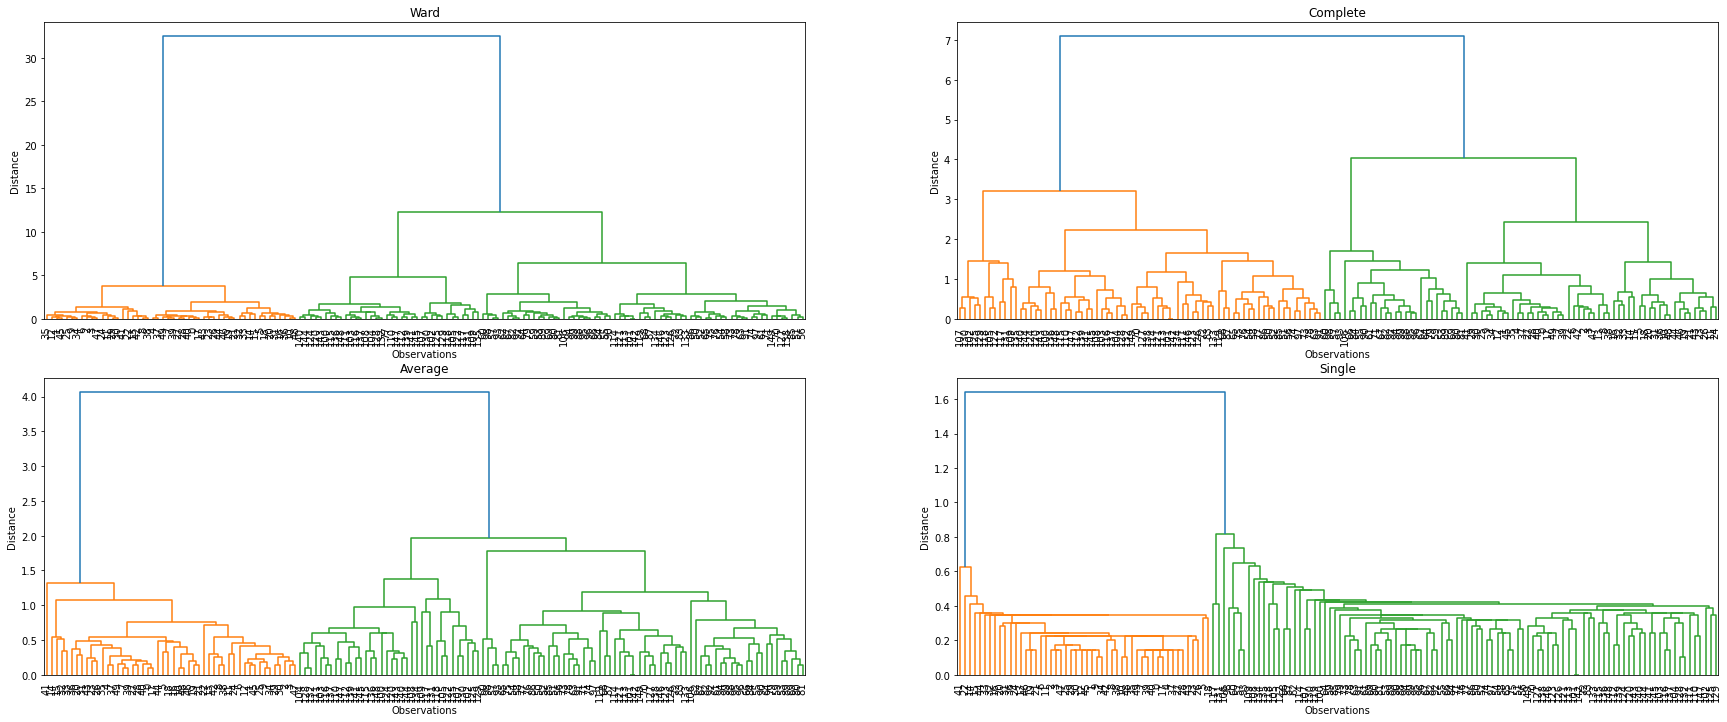

In [40]:
plt.figure(figsize = (30,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [ ]:
# ilk görsel daha mantikli ve 3 class alabiliriz diyebiliriz

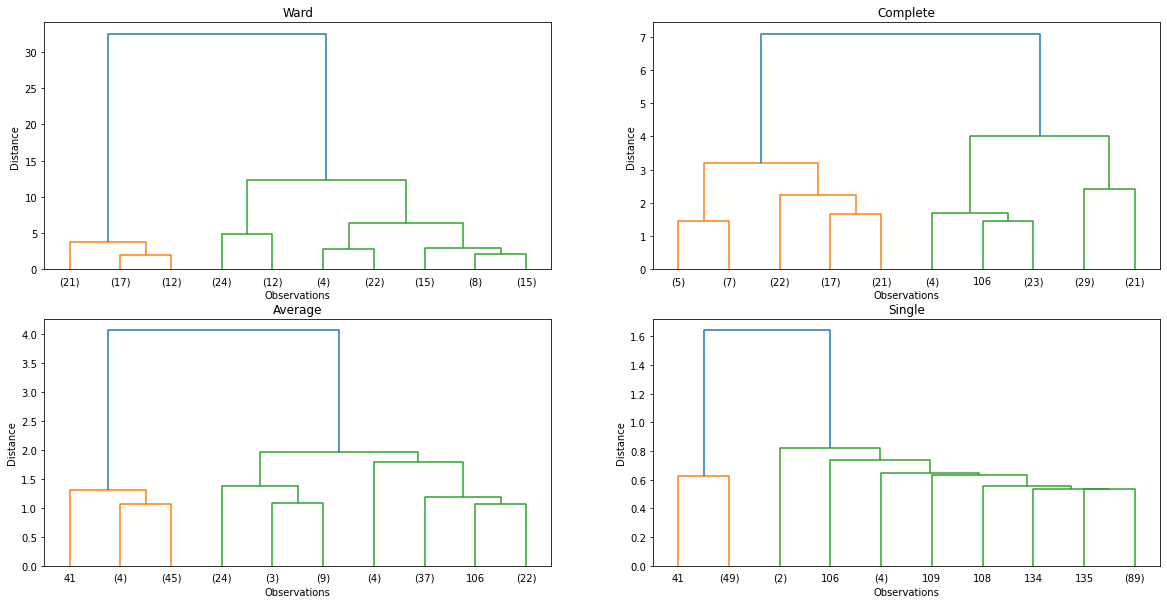

In [58]:
plt.figure(figsize = (20,10))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)  #p,son 10 taneyi göster bana diyoruz

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)  ,p=10 #yaparak aöttlardan cikan dallanmalari azallttik

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dallarda oluşacak küme sayısı
# truncate_mode='lastp'  ?????


#ward mantikli,complate 2 ve 4te denebilir,bunlar bir fikir veriyor kaca ayiracagiz diye

## Hierarchical Clustering (Agglomerative)

In [ ]:
# tümevarim yöntemi

In [42]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

In [43]:
from sklearn.metrics import silhouette_score

Modele kümelemeyi nerede bitireceğini söylemezsek ayrıştırdıkça ayrıştırabiliyor maşallah. Hele bide feature sayısı daha fazla filan olsaydı düşünemiyorum. O yüzden dendogramı yorumlayabilmek için truncate_mode hiperparametresi ve p hiperparametresi çok önemli gibi

In [44]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

    #burda inertia olmadigi,icin bunu dendogram ile destekliyorum,normalde burasi bana  2 diyor

f'Silhouette Score for {2} clusters {0.6867350732769779}
f'Silhouette Score for {3} clusters {0.5543236611296425}
f'Silhouette Score for {4} clusters {0.4889670857554696}
f'Silhouette Score for {5} clusters {0.48438258927906}
f'Silhouette Score for {6} clusters {0.35923761926030884}
f'Silhouette Score for {7} clusters {0.3422071936620506}
f'Silhouette Score for {8} clusters {0.3435906599119542}
f'Silhouette Score for {9} clusters {0.33048863528746625}


In [45]:
model1 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") # 
model1.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [46]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

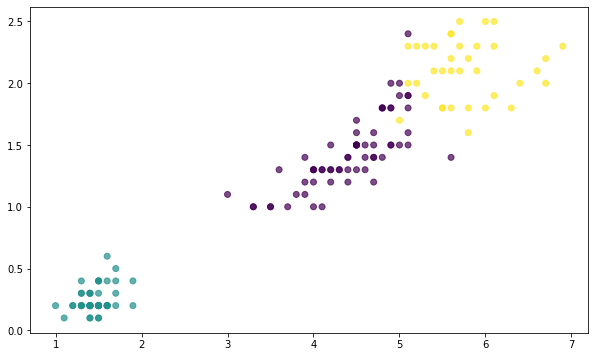

In [47]:
plt.scatter(X["petal_length"], X["petal_width"], c= model1.labels_, cmap= "viridis", alpha = 0.7);


In [48]:
clusters = model1.labels_

In [49]:
df["predicted_clusters"] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [59]:
odf = pd.read_csv("iris.csv")   #odf hoca koydugu isim,orginal dataFrame
labels=pd.DataFrame(odf["species"]) # müşteriden gelen label
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [60]:
X["predict_clusters"] =clusters   #burda güncelliyor,ama niye bu yaptigina düsünmeliyim
X["labels"]= labels
X

,sepal_length,sepal_width,petal_length,petal_width,perdict_clusters,labels,predict_clusters
0,5.1,3.5,1.4,0.2,1,setosa,1
1,4.9,3.0,1.4,0.2,1,setosa,1
2,4.7,3.2,1.3,0.2,1,setosa,1
3,4.6,3.1,1.5,0.2,1,setosa,1
4,5.0,3.6,1.4,0.2,1,setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,2
146,6.3,2.5,5.0,1.9,0,virginica,0
147,6.5,3.0,5.2,2.0,2,virginica,2
148,6.2,3.4,5.4,2.3,2,virginica,2


In [ ]:
ct = pd.crosstab(X["predict_clusters"], X["labels"])
ct

# 0. labels 49 doğru tahmin ama 15 fazladan tahmin etmiş onlarda yanlış 
# 1.    ''   50  ''     ''
#2.      ''  35  ''     ''   1 yanlış tahmin 14 ünü bilememiş 

labels,setosa,versicolor,virginica
predict_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
adjusted_rand_score(X.labels, X.predict_clusters) #???????????

0.7311985567707746

## Visualization Clusters

In [ ]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})   #map islemi
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

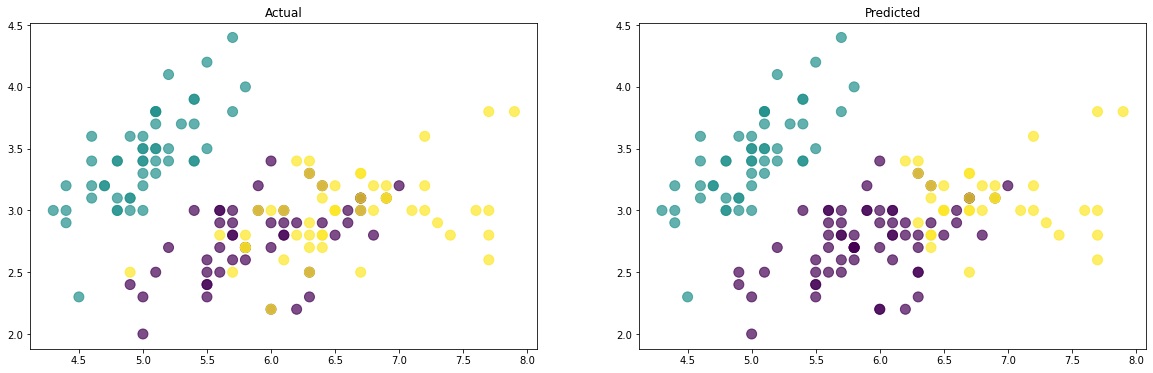

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.perdict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

#bunlar 3 boyutlu olarak düsündügümüzde ic ice olmayabilirler

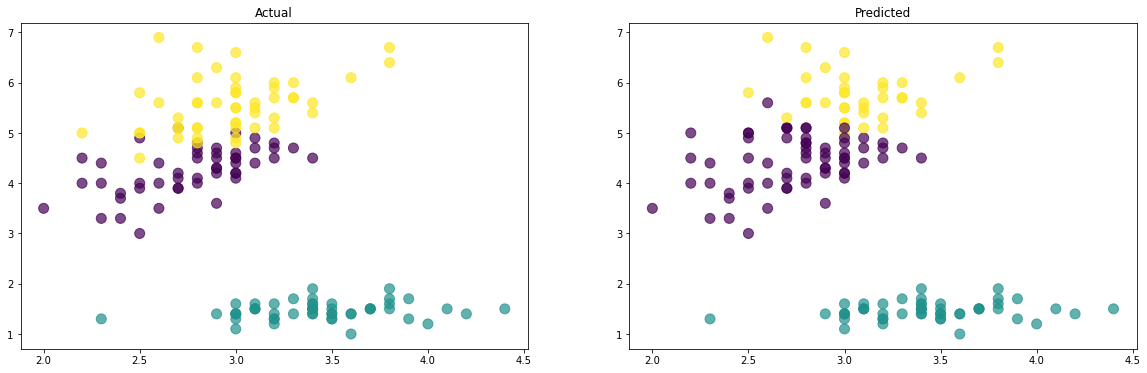

In [78]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");


## Remodeling according to discriminating features

In [79]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,perdict_clusters,labels,predict_clusters
0,5.1,3.5,1.4,0.2,1,setosa,1
1,4.9,3.0,1.4,0.2,1,setosa,1
2,4.7,3.2,1.3,0.2,1,setosa,1
3,4.6,3.1,1.5,0.2,1,setosa,1
4,5.0,3.6,1.4,0.2,1,setosa,1


In [80]:
clus_pred = X.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T  #bazi sütunlari aliyor,predict olani düsürüyor
clus_pred

burda ortalamalari aliyor

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


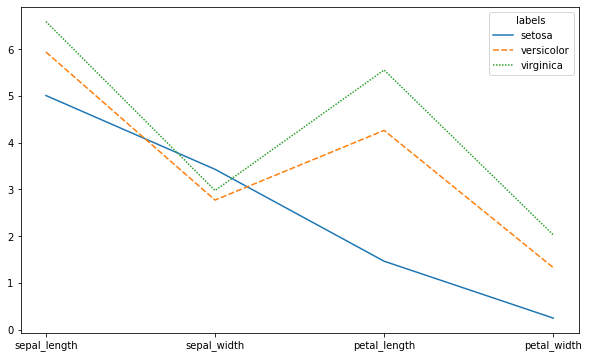

In [81]:
sns.lineplot(data = clus_pred);


#petal length daha iyi

<AxesSubplot:xlabel='labels', ylabel='petal_width'>

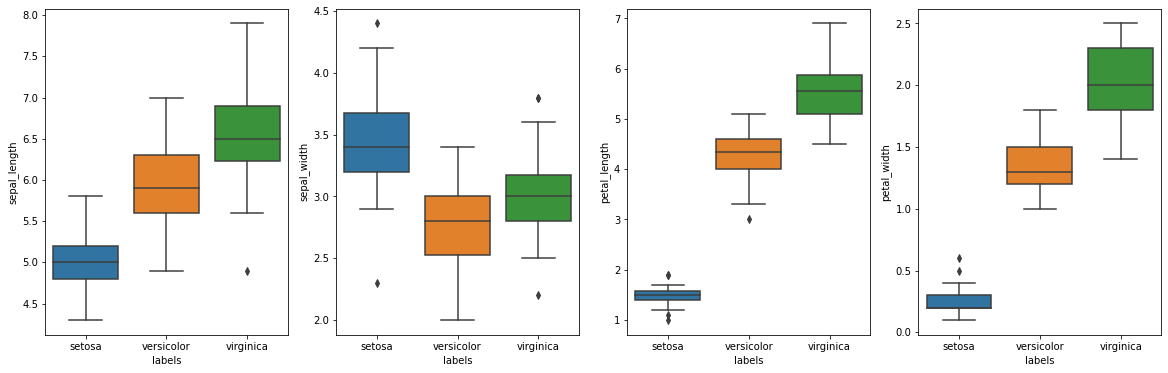

In [82]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X)

plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X)

plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X)

plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X)

#burda sagdaki iki güzel ayrismis,ver birbirlerini az kesmisler 

In [83]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Dendrogram

In [84]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

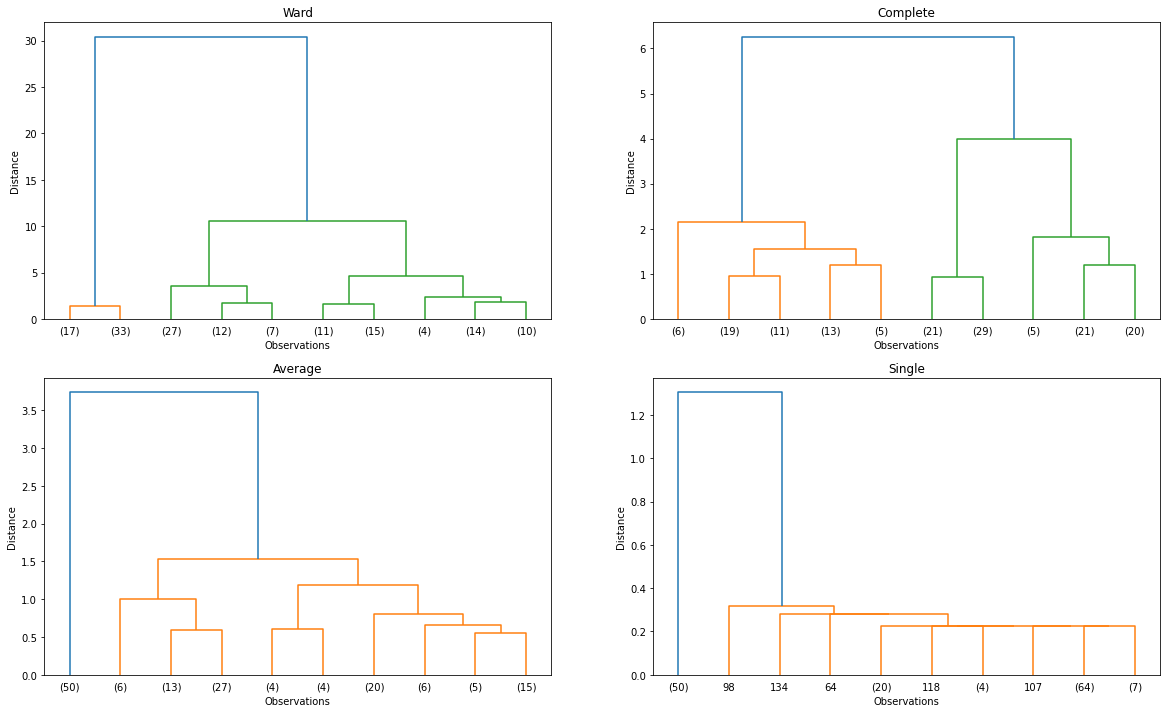

In [85]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [ ]:
# ilk ikisi 3 class iyi diyor

### S(Silhouette) Score

In [86]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

    # inertia degeriyok,bulmasi biraz zor ama burdan 3 olabilir diye düsünebiliriz,
    #yukarida dendogramda vardi,o da 3 diyordu,bilir kiside önemli

Silhouette Score for 2 clusters: 0.7669465622893307
Silhouette Score for 3 clusters: 0.6573949270307473
Silhouette Score for 4 clusters: 0.5895284483082736
Silhouette Score for 5 clusters: 0.5781917221789421
Silhouette Score for 6 clusters: 0.574738090950023
Silhouette Score for 7 clusters: 0.5830818101061305
Silhouette Score for 8 clusters: 0.5678904788273494
Silhouette Score for 9 clusters: 0.54699100118714


## Final model

In [87]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(X2)

#3 olarak aldik

In [88]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,2,setosa
1,1.4,0.2,2,setosa
2,1.3,0.2,2,setosa
3,1.5,0.2,2,setosa
4,1.4,0.2,2,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


In [89]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

#burda da hata yaptiklarini görüyürou

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,0,45,1
2,50,0,0


In [90]:
ct

labels,setosa,versicolor,virginica
predict_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [91]:
X2_labels = X2.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

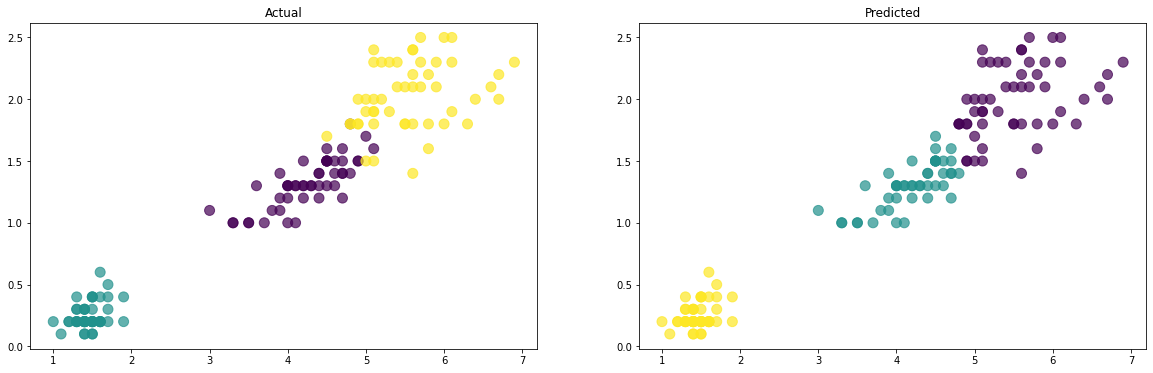

In [92]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

### ARI Score

In [ ]:
#err-ayy score

In [93]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

# bur da Kmeans'e yakin cikti

0.8857921001989628

## Prediction cluster of new data

In [94]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

#mevcut df'in altina ekleyip, modeli bir daha calistiriyoruz, cünkü burda akilda bisey tutmadigi icin,
#sanki onlardan bir gözlemmis gibi bastan calistiracagiz

In [95]:
final_model.predict(new_data)

#

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'